In [ ]:
"""For an image classification challenge, create and train a ConvNet in Python using TensorFlow. Also try to improve the performance of the model by applying various hyper parameter tuning to reduce 
the overfitting or under fitting problem that might occur. Maintain graphs of comparisons."""

In [ ]:
""" 
algorithm: 
1. Importing the libraries
2. Data Preprocessing
3. Building the CNN
4. Training the CNN
5. Making predictions and visualizing the results
6. Improving the CNN
7. Tuning the CNN
8. Comparing the results
9. Conclusion 

"""

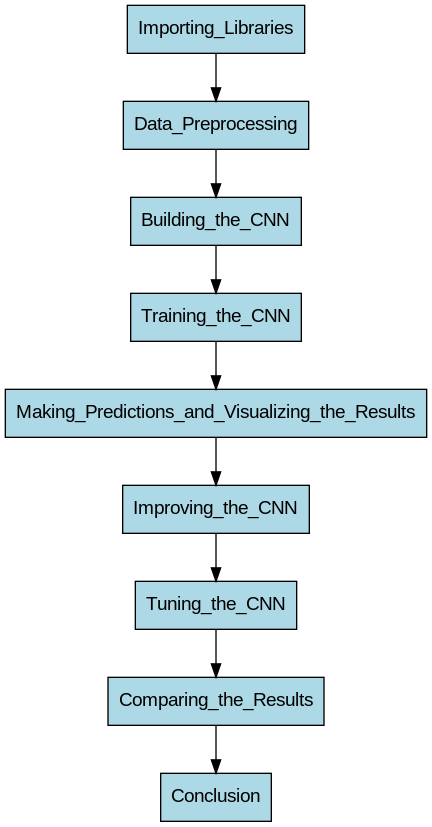

In [15]:
img = Image.open('convNet.png') 
img

In [3]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import os
from PIL import Image 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# load the image classifcation dataset 
dataset = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = dataset.load_data() 

# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# reshape the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


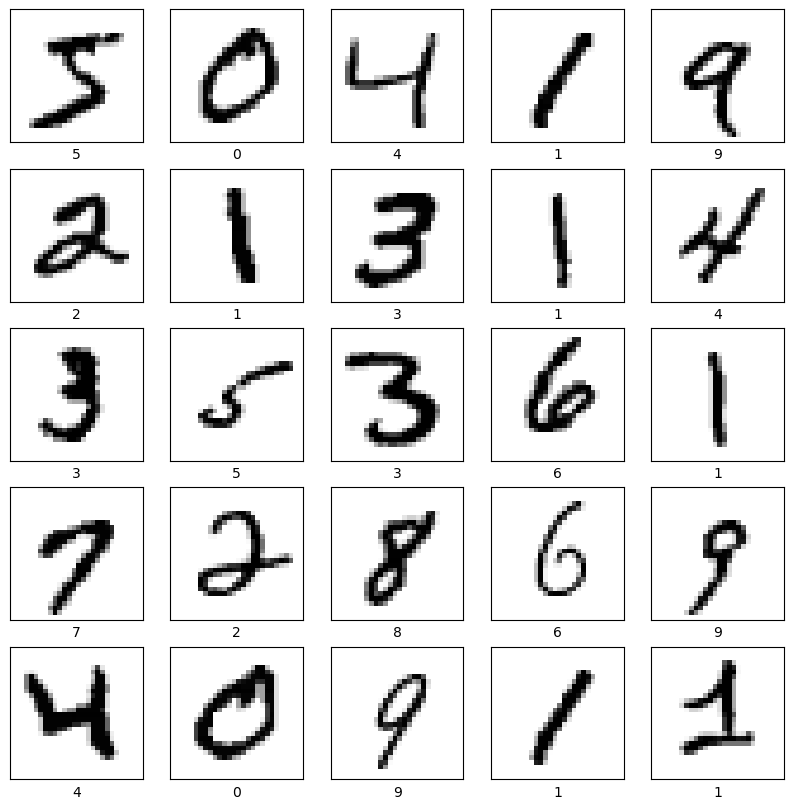

In [5]:
# display the first 25 images from the training set 
plt.figure(figsize=(10, 10)) 
for i in range(25): 
    plt.subplot(5, 5, i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False) 
    plt.imshow(x_train[i], cmap=plt.cm.binary) 
    plt.xlabel(y_train[i])
plt.show()


In [6]:
# create the model 
model = Sequential() 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

model.summary() 

/home/ap3x/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-23 23:36:43.095362: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-23 23:36:43.116708: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipp

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# before hyperparameter tuning 
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test)) 


Epoch 1/10


2024-04-23 23:38:36.705621: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8920 - loss: 0.3400

2024-04-23 23:39:12.805587: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8921 - loss: 0.3399 - val_accuracy: 0.9872 - val_loss: 0.0409
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9853 - loss: 0.0464 - val_accuracy: 0.9859 - val_loss: 0.0395
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9897 - val_loss: 0.0325
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9921 - loss: 0.0251 - val_accuracy: 0.9901 - val_loss: 0.0315
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9901 - val_loss: 0.0320
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9894 - val_loss: 0.0375
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9962 - loss: 0.0119 - val_accuracy: 0.9913 - val_loss: 0.0326
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9968 - loss: 0.01

AttributeError: 'Sequential' object has no attribute 'predict_classes'

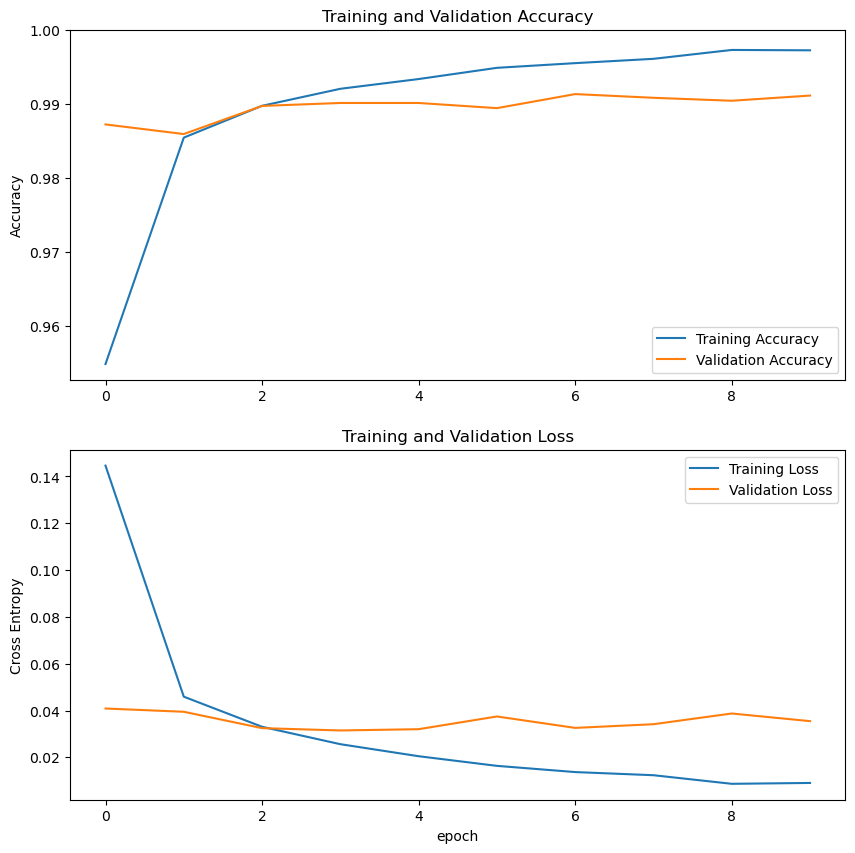

In [10]:

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# conf_mat = tf.math.confusion_matrix(y_test, model.predict_classes(x_test)) 



# plot the accuracy and loss 
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



In [13]:
# hyperparameter tuning 
# 1. learning rate
# 2. batch size
# 3. number of epochs
# 4. optimizer
# 5. activation function
# 6. kernel size
# 7. number of filters

# training the model with hyperparameter tuning 

model_ = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32) 


Epoch 1/10
   3/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 1.0000 - loss: 0.0014 

2024-04-23 23:47:16.696389: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9982 - loss: 0.0055

2024-04-23 23:47:52.339568: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9916 - val_loss: 0.0331
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9981 - loss: 0.0065 - val_accuracy: 0.9920 - val_loss: 0.0373
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9983 - loss: 0.0054 - val_accuracy: 0.9913 - val_loss: 0.0462
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9979 - loss: 0.0063 - val_accuracy: 0.9886 - val_loss: 0.0503
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9929 - val_loss: 0.0393
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9912 - val_loss: 0.0413
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9986 - loss: 0.0042 - val_accuracy: 0.9895 - val_loss: 0.0488
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9987 - loss: 0.00

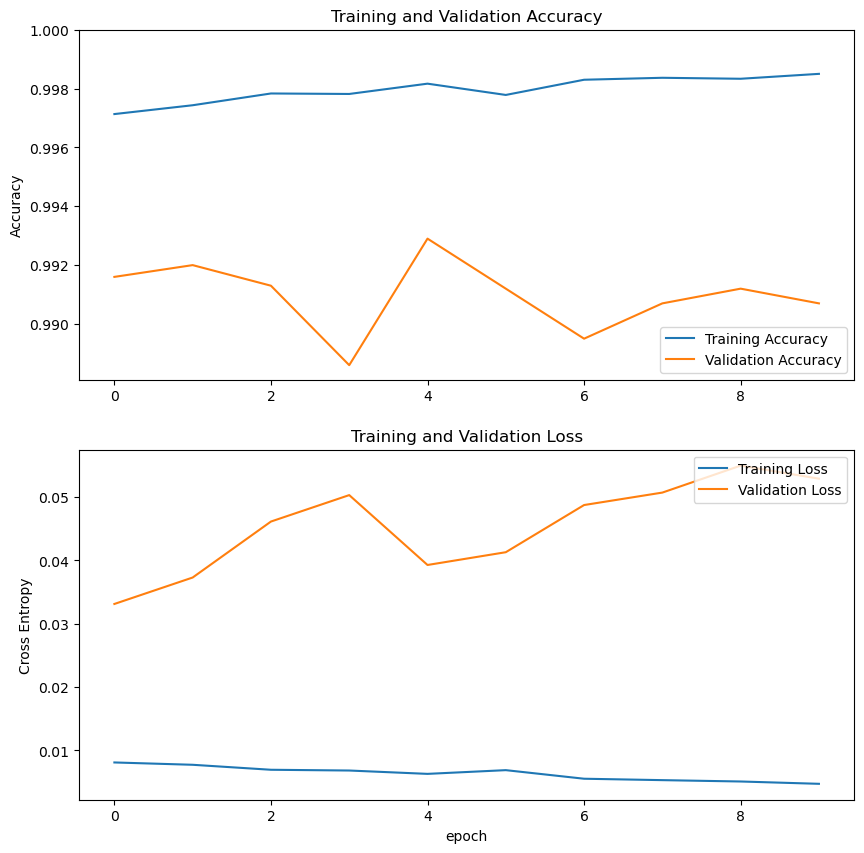

In [14]:
res = model_.history 
acc = res['accuracy']
val_acc = res['val_accuracy']
loss = res['loss'] 
val_loss = res['val_loss']

# plot the accuracy and loss 

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
